In [22]:
# Install required packages if necessary
"""
%pip install matplotlib
%pip install sklearn
%pip install pandas
"""

'\n%pip install matplotlib\n%pip install sklearn\n%pip install pandas\n'

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd

Text(0.5, 1.0, 'Raw Data')

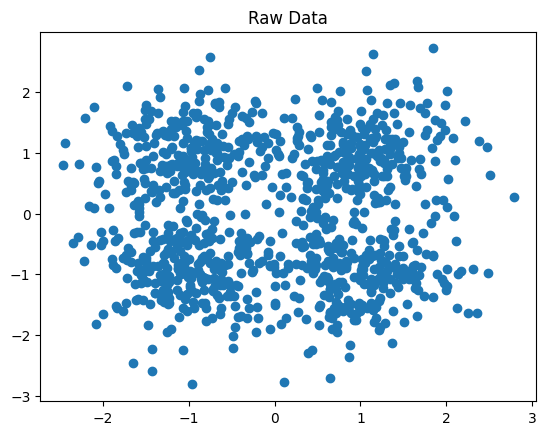

In [24]:
### Read data from the CSV file ###

# Get data from the CSV as a Pandas DataFrame
data_frame = pd.read_csv('cluster_data.csv')

X = data_frame.values.tolist() # List of data points
X_T = data_frame.T.values.tolist()
X1 = X_T[0] # List of x-axis values
X2 = X_T[1] # List of y-axis values

# Plot the data as a scatter plot
plt.scatter(X1, X2)
plt.title("Raw Data")

/home/jren/miniconda3/envs/PAL_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jren/miniconda3/envs/PAL_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jren/miniconda3/envs/PAL_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jren/miniconda3/envs/PAL_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

Text(0, 0.5, 'Mean Silhouette Score')

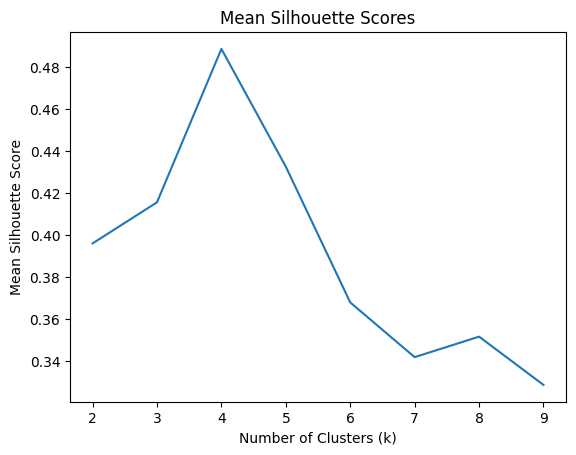

In [25]:
### Determine optimal number of clusters using silhouette scores ###

sil_scores = [] # List of mean silhouette scores
k_vals = [] # List of k-values tried

# Iterate through a range of k-values
for k in range(2,10):
    k_vals.append(k)
    model = KMeans(n_clusters=k) # k-means model
    model.fit(X) # Fit the model on our data

    # Calculate the mean silhouette score 
    sil = metrics.silhouette_score(X, model.labels_, metric='euclidean')
    sil_scores.append(sil)

# Plot the silhouette scores
plt.plot(k_vals, sil_scores) 
plt.title("Mean Silhouette Scores")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Mean Silhouette Score")


/home/jren/miniconda3/envs/PAL_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Clustered Data')

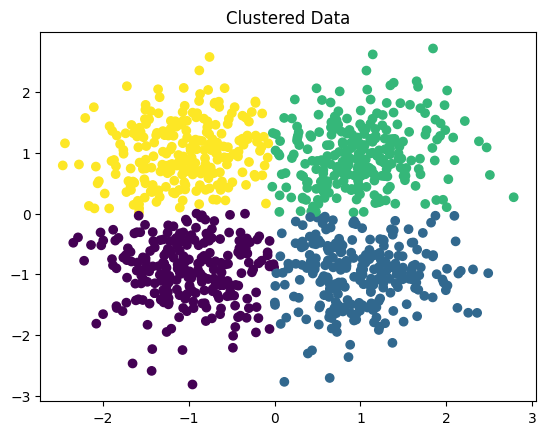

In [26]:
### Run k-means clustering ###

# Fit a k-means model on the data using k = 4 clusters
model = KMeans(n_clusters = 4)
model.fit(X)
y_pred = model.predict(X)

# Plot the results
plt.scatter(X1, X2, c=y_pred)
plt.title("Clustered Data")

# TODO: include centroids?